#Visualizing GP Priors and Posteriors for Regression
Our data will consist of scalar inputs and  generated using the model $y = sin(x) + \epsilon_n$ with $\epsilon ∼ N(0, σ^2 )$
where $σ^2 = 0.05$. I generate N = 100 uniformly spaced inputs $x_1 , . . . , x_N$ in the interval $[0, 4\pi]$ and
generated the corresponding outputs $y_1 , . . . , y_N$ from the above model. For each of the following 5 values of l= [0.2, 0.5, 1, 2, 10], I have done the followings.
* Drawn a random sample from the GP prior $p(f ) = N(0, K)$ and ploted it red-dashad line.
* Ploted the mean of the GP posterior, on the same plot but with a green-solid line.
• On the same plot, I have shown the true function (sin(x)) evaluated at the generated inputs.





#Makeing all necessary imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#Generating data ponts as the problem stated.

In [2]:
x = np.linspace(0, 4 * np.pi, 100).reshape(100, 1)
y_true = np.sin(x)
y_noisy = np.sin(x) + np.random.normal(loc=0, scale=np.sqrt(0.05), size=(100, 1))

For l= [0.2, 0.5, 1, 2]
* Drawn a random sample from the GP prior $p(f ) = N(0, K)$ and ploted it red-dashad line.
* Ploted the mean of the GP posterior, on the same plot but with a green-solid line.
• On the same plot, I have shown the true function (sin(x)) evaluated at the generated inputs.

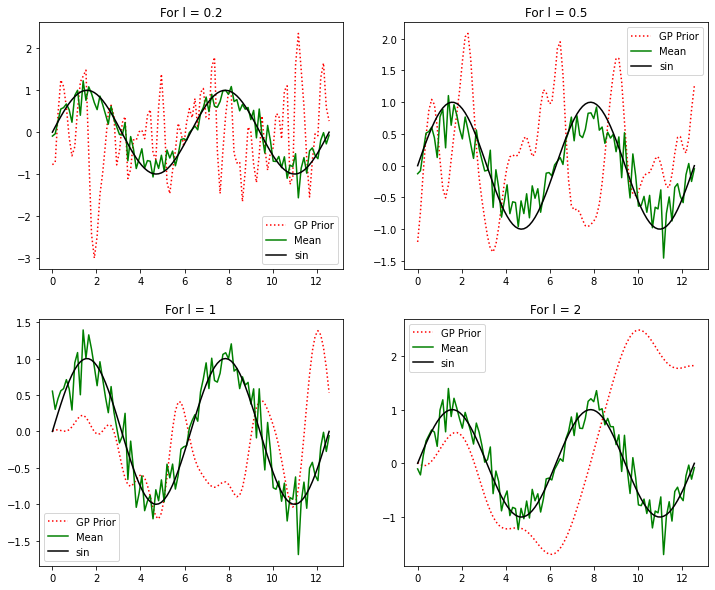

In [3]:
figure, axis = plt.subplots(2, 2,figsize=(12,10))
l=[0.2, 0.5, 1, 2]
dim1=0
dim2=0
for value in l:
    if value==0.5:
        dim1=0
        dim2=1
    if value==1:
        dim1=1
        dim2=0
    if value==2:
        dim1=1
        dim2=1

    K = np.zeros((100, 100))
    for i in range(100):
        for j in range(100):
            num = (x[i] - x[j]) @ (x[i] - x[j])
            K[i, j]= 1.0*np.exp((-num) / (value**2))

    sigma = np.linalg.inv(np.linalg.inv(np.linalg.inv(K)) + (np.eye(100, 100) / 0.05))
    mean = (sigma @ y_noisy) / 0.05

    axis[dim1, dim2].plot(x,  np.random.multivariate_normal(np.zeros(100), K), 'r', linestyle='dotted',label='GP Prior')
    axis[dim1, dim2].plot(x, mean, 'g',label='Mean')
    axis[dim1, dim2].plot(x, y_true, 'k',label='sin')
    axis[dim1, dim2].set_title('For l = '+str(value))
    axis[dim1, dim2].legend()
plt.show()

For l= 10.0
* Drawn a random sample from the GP prior $p(f ) = N(0, K)$ and ploted it red-dashad line.
* Ploted the mean of the GP posterior, on the same plot but with a green-solid line.
• On the same plot, I have shown the true function (sin(x)) evaluated at the generated inputs.

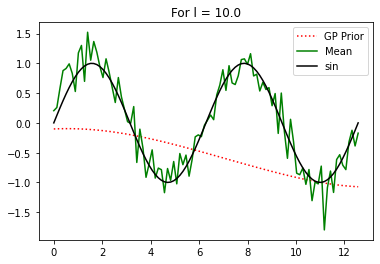

In [4]:
value=10.0
K = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        squared = (x[i] - x[j]) @ (x[i] - x[j])
        K[i, j]= 1.0*np.exp((-squared) / (value**2))

sigma = np.linalg.inv(np.linalg.inv(np.linalg.inv(K)) + (np.eye(100, 100) / 0.05))
mean = (sigma @ y_noisy) / 0.05

plt.plot(x,  np.random.multivariate_normal(np.zeros(100), K), 'r', linestyle='dotted', label='GP Prior')
plt.plot(x, mean, 'g',label='Mean')
plt.plot(x, y_true, 'k',label='sin')
plt.title('For l = '+str(value))
plt.legend()
plt.show()